In [1]:
# Import pandas 
import pandas as pd
 
# Read the dataset using read_csv method
df = pd.read_csv("Advertising.csv")
 
# See the top-5 records in the data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
# Independent variables or Features
X = df[['TV', 'Radio', 'Newspaper']] 
 
# Dependent or Target variable
y = df.Sales 


In [3]:
# Import train_test_split function from 
from sklearn.model_selection import train_test_split
 
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [4]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
 
# Create linear regression model
lin_reg = LinearRegression()
 
# Fit the linear regression model
lin_reg.fit(X_train, y_train)
 
# Predict the values given test set
predictions = lin_reg.predict(X_test)

# Print the intercept and coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_)

2.89257005115115
[0.04416235 0.19900368 0.00116268]


In [5]:
# Import the required libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_test, predictions))

Mean Absolute Error(MAE): 1.3000320919235449
Mean Squared Error(MSE): 4.012497522917098
Root Mean Squared Error(RMSE): 2.0031219440955406
R2-Square: 0.8576396745320893


### Q1. Using the above model, what is the expected values of Sales given that: TV= 190, Radio=11, Newspaper=60


In [6]:
new_data = pd.DataFrame({
    'TV': [190],
    'Radio': [11],
    'Newspaper': [60]
})

sales_prediction = lin_reg.predict(new_data)
print(sales_prediction)


[13.54221709]


### Q2. Build a linear regression model for the Salaries.csv data set


In [7]:
df_sal = pd.read_csv("Salaries.csv")
df_sal.head()

X = df_sal[['YearsExperience']] 
 
# Dependent or Target variable
y = df_sal.Salary
 
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
 
# Create linear regression model
lin_reg = LinearRegression()
 
# Fit the linear regression model
lin_reg.fit(X_train, y_train)
 
# Predict the values given test set
predictions = lin_reg.predict(X_test)



### Q3. Print the model coefficients


In [8]:
# Print the intercept and coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_)



26986.691316737248
[9379.71049195]


### Q4. Draw a scatter plot for Salary vs Years of Experience, and on the same chart plot Predicted Salary vs Years of Experience 


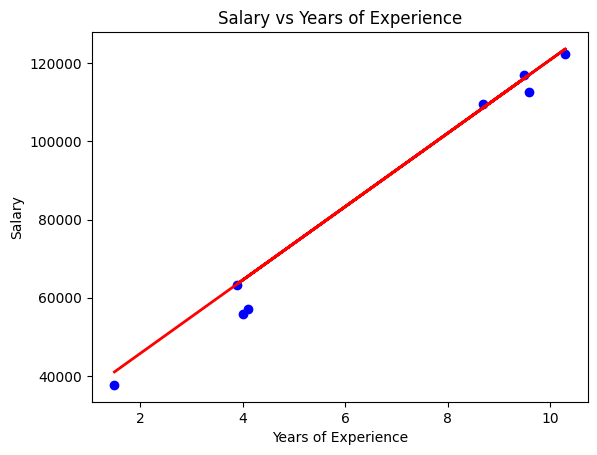

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='red', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()


### Q5. What's the predicted salary for a person with 12 years of experience


In [10]:
experience = pd.DataFrame({
    'YearsExperience': [12]
})
predicted_salary = lin_reg.predict(experience)
print(predicted_salary)


[139543.21722009]


### Q6. What's is RSME for the model? What does that mean?

In [11]:
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_test, predictions))

Mean Absolute Error(MAE): 3508.5455930660555
Mean Squared Error(MSE): 22407940.143340684
Root Mean Squared Error(RMSE): 4733.70258289858
R2-Square: 0.9779208335417602


The RSME suggests that a typical prediction error is 4733.703.

### Logistic Regression

In [12]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
 
# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label

# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [14]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for performance evaluation
 
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)
#print(abs(predictions - target_test))

 
# Assess model performance using accuracy measure
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(target_test, predictions)
print (cnf_matrix)


print("Accuracy:",metrics.accuracy_score(target_test, predictions))

print ("F1: ", metrics.f1_score(target_test, predictions, average='binary'))


[[132  14]
 [ 36  49]]
Accuracy: 0.7835497835497836
F1:  0.6621621621621621


### Q7. Given these numbers, check if it's likely that the person will get diabetes
### {'pregnant': [7], 'insulin': [180], 'bmi': [35], 'age': [34], 'glucose': [130], 'bp': [70], 'pedigree': [0.6]}

In [15]:
new_patient = pd.DataFrame({'pregnant': [7], 'insulin': [180], 'bmi': [35], 'age': [34], 'glucose': [130], 'bp': [70], 'pedigree': [0.6]})
diabetes_likelihood = logreg.predict(new_patient)
print(diabetes_likelihood)


[0]


### Q8. Change the age to 35, check if it's likely that the person will get diabetes


In [16]:
new_patient = pd.DataFrame({'pregnant': [7], 'insulin': [180], 'bmi': [35], 'age': [35], 'glucose': [130], 'bp': [70], 'pedigree': [0.6]})
diabetes_likelihood = logreg.predict(new_patient)
print(diabetes_likelihood)

[1]


### Q9. Given the LoanPayback data set, build a logistic regression model

In [17]:
loan_data = pd.read_csv('LoanPayback.csv')

# Clean the data: Drop the unnecessary NaN columns and rows with any NaN values
loan_data = loan_data.dropna(axis='columns', how='all').dropna()


X = loan_data[['Income ($000)', 'Loan Amount ($000)', 'State']]
y = loan_data['Payback\n(0 = No, 1 = Yes)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)  # Increase max_iter if convergence issues

# Fit the model with data
logistic_model.fit(X_train, y_train)

# Predict the target variable for the given test dataset
predictions = logistic_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, predictions)
conf_matrix = metrics.confusion_matrix(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"F1 Score: {f1}")

Accuracy: 0.9090909090909091
Confusion Matrix: 
[[8 1]
 [0 2]]
F1 Score: 0.8


### Q10. Is it likely that a student with income 14000 will payback a 5000 loan?

In [18]:
new_student = pd.DataFrame({'Income ($000)': [14000], 'Loan Amount ($000)': [5000], 'State': [1]})
payback_likelihood = logistic_model.predict(new_student)
print(payback_likelihood)


[0]
